In [2]:

import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations,product
import random
import math
import heapq
from matplotlib.patches import FancyArrowPatch
plt.rcParams['animation.embed_limit'] = 50
import warnings
warnings.filterwarnings('ignore')

## HEX Game
HEX is a board gam played on a hexagonal grid. Two players aim to create an unbroken chain of their pieces from one side of the board to the other. Gale's algorithm provides a proof of the fact that there is exactly one player in HEX.

## Description of the algorithm
The proof relies on topological principles rather than being an algorithm in the computational sense.

1. **Hex Board Representation**: Consider the Hex board as a set of hexagonal cells connected to each other. The board is such that two opposite sides are marked for each player. One player tries to connect the top to the bottom, and the other player tries to connect the left side to the right side.

2. **Continuous Path Formation**: Each player places one stone on the board in turn, aiming to create a continuous path connecting their respective sides.

3. **Inevitability of a Connecting Path**: Gale's key insight was that once the board is completely filled, there must exist a continuous path of stones for one player or the other, creating a bridge from one side of the board to their opposite side. This is because:
   - The edges of the board can be considered as part of the paths.
   - When the board is filled, it's topologically impossible for both players to fail in forming such paths because these paths cannot intersect.

4. **Application of the Jordan Curve Theorem**: This theorem in topology states that a continuous loop in a plane divides the plane into an "inside" and an "outside." In the context of Hex, this implies that if one player does not complete a path, the hexagons must form a loop that inevitably allows the other player to complete their path.

5. **Conclusion**: Therefore, a draw is impossible in Hex. One of the two players must eventually form a connecting path, ensuring that every game of Hex has a winner.

Gale's proof elegantly demonstrates the impossibility of a draw in Hex using topological principles, highlighting the deep mathematical underpinnings of what appears to be a simple board game.








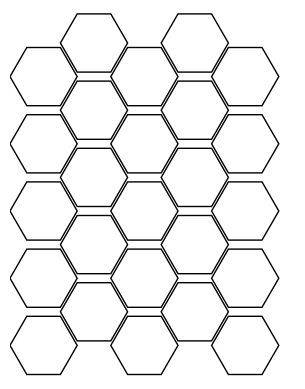

In [3]:
def draw_hex_board(n):
    """
    Draw an n x n Hex board with hexagons positioned next to each other.
    """
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')

    # Adjust the radius of the hexagons so that they fit next to each other
    radius = 1 / np.sqrt(3)

    # Calculate the coordinates for each hexagon
    for x in range(n):
        for y in range(n):
            hexagon = patches.RegularPolygon((x * 1.5 * radius, y * 2 * radius + (x % 2) * radius), 
                                              numVertices=6, 
                                              radius=radius, 
                                              orientation=np.radians(30), 
                                              edgecolor='black', 
                                              facecolor='none')
            ax.add_patch(hexagon)

    # Set the limits of the plot
    ax.set_xlim([-radius, n * 1.5 * radius])
    ax.set_ylim([-radius, n * 2 * radius])

    # Remove axes for visual clarity
    ax.axis('off')

    plt.show()

# Draw a Hex board of size 5x5 with no gaps between hexagons
draw_hex_board(5)


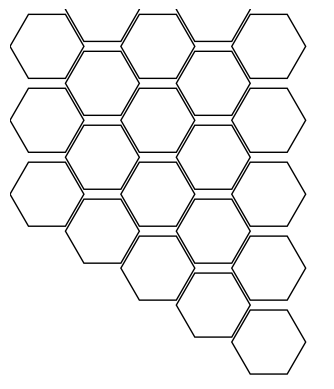

In [52]:
def draw_rhombus_hex_board(n):
    """
    Draw an n x n Hex board in a rhombus shape with hexagons positioned next to each other.
    """
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')

    # Adjust the radius of the hexagons so that they fit next to each other
    radius = 1 / np.sqrt(3)

    # Calculate the coordinates for each hexagon in a rhombus-shaped layout
    for x in range(n):
        for y in range(-x, n-x):
            hexagon = patches.RegularPolygon((x * 1.5 * radius, (y + x / 2) * 2 * radius), 
                                              numVertices=6, 
                                              radius=radius, 
                                              orientation=np.radians(30), 
                                              edgecolor='black', 
                                              facecolor='none')
            ax.add_patch(hexagon)

    # Set the limits of the plot
    ax.set_xlim([-radius, n * 1.5 * radius])
    ax.set_ylim([-n * radius, n * radius])

    # Remove axes for visual clarity
    ax.axis('off')

    plt.show()

# Draw a Hex board of size 5x5 in a rhombus shape
draw_rhombus_hex_board(5)


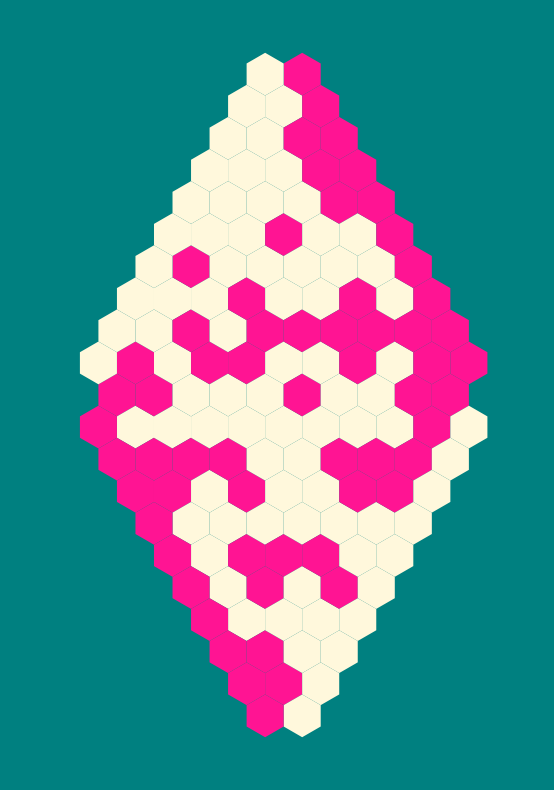

In [4]:
def draw_rhombus_hex_board(n,radius=1):
    """
    Draw an n x n Hex board in a rhombus shape with hexagons tightly positioned next to each other.
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(10,10)
    ax.set_aspect('equal')
    ax.set_facecolor('gray')
    fig.set_facecolor("teal")

    # Define the radius of the hexagons to fit tightly
    
    dx=math.sqrt(3)/2
    dy=3/2
    
    # Calculate the coordinates for each hexagon in a rhombus-shaped layout
    for x in range(n):
        for y in range(n):

            hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                              numVertices=6, 
                                              radius=1, 
                                              orientation=np.radians(60), 
                                              edgecolor="none", 
                                              facecolor=random.choice(["deeppink","cornsilk"]))
            ax.add_patch(hexagon)
    for x in range(n):
        for y in [-1,n]:
            hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                                numVertices=6, 
                                                radius=1, 
                                                orientation=np.radians(60), 
                                                edgecolor="none", 
                                                facecolor="deeppink")#random.choice(["deeppink","cornsilk"]))
            ax.add_patch(hexagon)
            hexagon = patches.RegularPolygon(((x +y) *dx, (x - y ) * dy), 
                                                numVertices=6, 
                                                radius=1, 
                                                orientation=np.radians(60), 
                                                edgecolor="none", 
                                                facecolor="cornsilk")#random.choice(["deeppink","cornsilk"]))
            ax.add_patch(hexagon)

    # Set the limits of the plot
    ax.set_xlim([-n*radius/2, 2*n * radius])
    ax.set_ylim([-1.8*n*radius, 1.8*n* radius])
    ax.set_axis_off()



# Draw a Hex board of size 5x5 in a rhombus shape without gaps
draw_rhombus_hex_board(10)


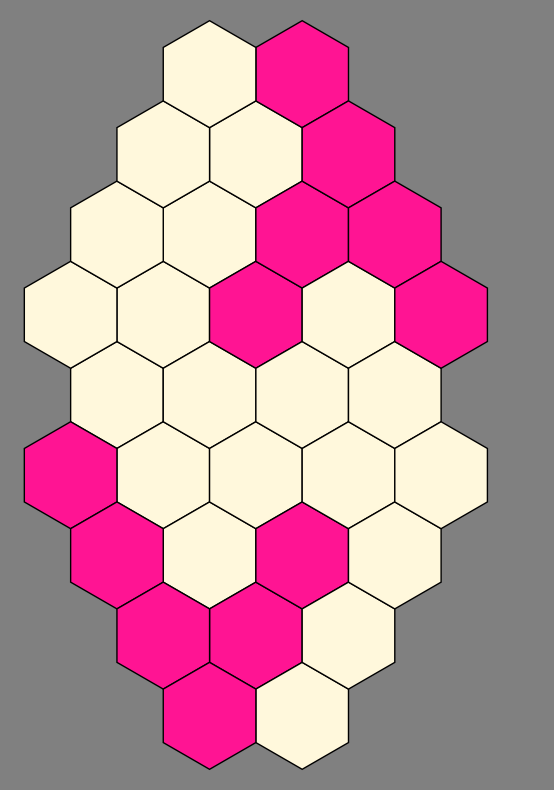

In [261]:
draw_rhombus_hex_board(4)

In [373]:
from constants import colors

In [375]:
print(colors)

['cyan', 'magenta', 'lime', 'yellow', 'hotpink', 'deepskyblue', 'springgreen', 'mediumorchid', 'dodgerblue', 'lightcoral', 'mediumspringgreen', 'lightsalmon', 'blueviolet', 'aqua', 'chartreuse', 'mediumvioletred', 'lightseagreen', 'darkorange', 'lightpink', 'darkturquoise']


In [5]:
def draw_rhombus_hex_board(n,radius=1):
    """
    Draw an n x n Hex board in a rhombus shape with hexagons tightly positioned next to each other.
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(10,10)
    ax.set_aspect('equal')
    ax.set_facecolor('gray')
    fig.set_facecolor("cornsilk")
    colors=["#0B3954","deeppink"]
    # Define the radius of the hexagons to fit tightly
    
    dx=math.sqrt(3)/2
    dy=3/2
    centers=[(x,y) for (x,y) in product(list(range(n)),list(range(n)))]
    center_color=dict()
    for (x,y) in centers:
        center_color[(x,y)]=random.choice(colors)
    # Calculate the coordinates for each hexagon in a rhombus-shaped layout
    for (x,y) in centers:
        hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                            numVertices=6, 
                                            radius=1, 
                                            orientation=np.radians(60), 
                                            edgecolor="none", 
                                            facecolor=random.choice(["deeppink","cornsilk"]))
        ax.add_patch(hexagon)
    for x in range(n):
        for y in [-1,n]:
            centers.append((x,y))
            centers.append((y,x))
            center_color[(x,y)]=colors[1]
            center_color[(y,x)]=colors[0]
    # center_color[(3,3)]="yellow"
    # center_color[(3,4)]="green"
    # center_color[(4,4)]="blue"
    # center_color[(2,3)]="red"
    for (x,y) in centers:
        hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                            numVertices=6, 
                                            radius=1, 
                                            orientation=np.radians(60), 
                                            edgecolor="none", 
                                            facecolor=center_color[(x,y)])#random.choice(["deeppink","cornsilk"]))
        ax.add_patch(hexagon)
            
    edges =[]
    for (u,v) in centers:
        if (u,v+1) in centers:
            edges.append(((u,v),(u,v+1)))
        if (u+1,v+1) in centers:
            edges.append(((u,v),(u+1,v+1)))
        if (u-1,v) in centers:
            edges.append(((u,v),(u-1,v)))
    for ((u,v),(x,y)) in edges:
        if center_color[(u,v)]!=center_color[(x,y)]:
            u,v=(u+v)*dx,(v-u)*dy
            x,y=(x+y)*dx,(y-x)*dy
            m=((u+x)/2,(v+y)/2)
            v=((x-u)/2,(y-v)/2)
            v=(v[1]/math.sqrt(3),-v[0]/math.sqrt(3))
            p=(m[0]+v[0],m[1]+v[1])
            q=(m[0]-v[0],m[1]-v[1])
            ax.plot([p[0], q[0]], [p[1], q[1]], marker="none",color='cornsilk')
    # Set the limits of the plot
    ax.set_xlim([-n*radius/2, 2*n * radius])
    ax.set_ylim([-1.8*n*radius, 1.8*n* radius])
    ax.set_axis_off()


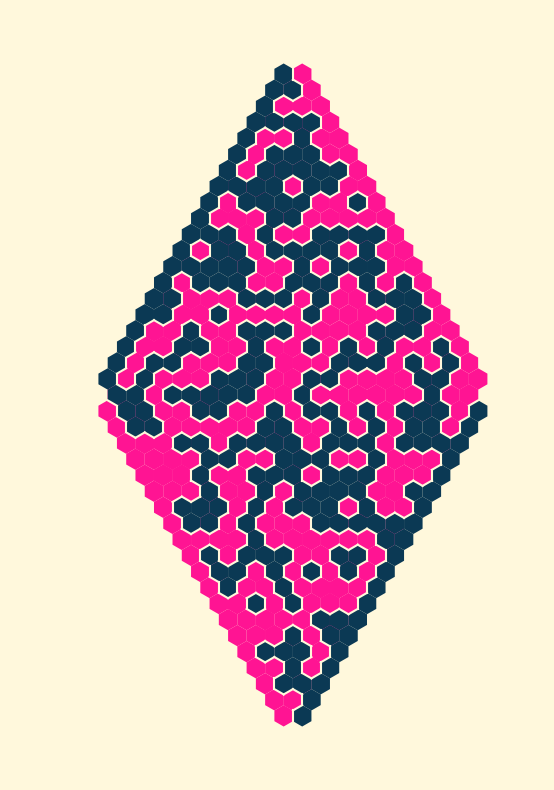

In [6]:
draw_rhombus_hex_board(20)